In [8]:
import math

import giancarlo as gc
gc.PlotStyle.style = 'dark_background'

Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
Qp = gc.Symbol('Q_+')
Qm = gc.Symbol('Q_-')

u, ubar = gc.SpinorField('u')
d, dbar = gc.SpinorField('d')
A = gc.PhotonField()

class Jiso:
    def __init__(self, x, mu):
        sa, sb = gc.default.var(), gc.default.var()
        self.sa = sa
        self.sb = sb
        self.x = x
        self.mu = mu

    
    def __call__(self, i=None):
        up = ubar(self.x, self.sa) * gc.DiracGamma(self.mu, self.sa, self.sb) * A(self.x, self.mu) * u(self.x, self.sb)
        down = dbar(self.x, self.sa) * gc.DiracGamma(self.mu, self.sa, self.sb) * A(self.x, self.mu) * d(self.x, self.sb)
        if i==0:
            return gc.CNumber(1,2) * (up+down)
        elif i==1:
            return gc.CNumber(1,2) * (up - down)
        return gc.CNumber(1,2) * Qp * (up+down) + (gc.CNumber(1,2) * Qm * (up - down))

def J1(x, mu):
    a, b = gc.default.var(), gc.default.var()
    up = ubar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)
    down = dbar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)
    return gc.CNumber(1, 2) * (up - down)

def Jn(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return gc.CNumber(math.sqrt(2), 2) * dbar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)

def Jp(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return gc.CNumber(math.sqrt(2), 2) * ubar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)

isoqcd = {'S_u': 'S', 'S_d': 'S'}

J1('x', r'\mu')

( +\frac{1}{2}\,\bar{u}(x, x_{25})\,G(\mu, x_{25})\,G(\mu, x_{26})\,u(x, x_{26})-\frac{1}{2}\,\bar{d}(x, x_{25})\,G(\mu, x_{25})\,G(\mu, x_{26})\,d(x, x_{26}) )

In [9]:
(J1('x', r'\mu') * J1('y', r'\nu')).wick().replace(isoqcd).trace(['spin']).simplify()

( +\frac{1}{4}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_{u}(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_{u}(y, y) ]-\frac{1}{4}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_{u}(x, y)\,\gamma_{\nu}\,S_{u}(y, x) ]-\frac{1}{4}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_{u}(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_{d}(y, y) ]-\frac{1}{4}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_{d}(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_{u}(y, y) ]+\frac{1}{4}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_{d}(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S_{d}(y, y) ]-\frac{1}{4}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_{d}(x, y)\,\gamma_{\nu}\,S_{d}(y, x) ] )

In [10]:
(Jp('x', r'\mu') * Jn('y', r'\nu')).wick().replace(isoqcd).trace(['spin']).simplify()

( -\frac{1}{2}\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S_{d}(x, y)\,\gamma_{\nu}\,S_{u}(y, x) ] )

# HVP Isospin-1 QED corrections

In [11]:
gc.PlotStyle.points['z1'] = gc.PlotStyle.point(color='C2')
gc.PlotStyle.points['z2'] = gc.PlotStyle.point(color='C2')

Jz1 = Jiso('z1', r'\alpha')
Jz2 = Jiso('z2', r'\beta')

syms = []
syms.append(gc.ExchangeSymmetry(pos=[Jz1.x, Jz2.x], lorentz=[Jz1.mu, Jz2.mu]))
syms.append(gc.ExchangeSymmetry(spin=[Jz1.sa, Jz2.sa]))
syms.append(gc.ExchangeSymmetry(spin=[Jz1.sb, Jz2.sb]))

double_qed = Jz1() * Jz2()

In [12]:
hvp_qed = J1('x', r'\mu') * J1('y', r'\nu') * double_qed
hvp_qed_1 = hvp_qed.wick().replace(isoqcd)

len(hvp_qed_1)

KeyboardInterrupt: 

In [5]:
len(hvp_qed_1.simplify())

14

In [6]:
hvp_qed_2 = hvp_qed_1.trace(['spin']).simplify(*syms)
len(hvp_qed_2)

6

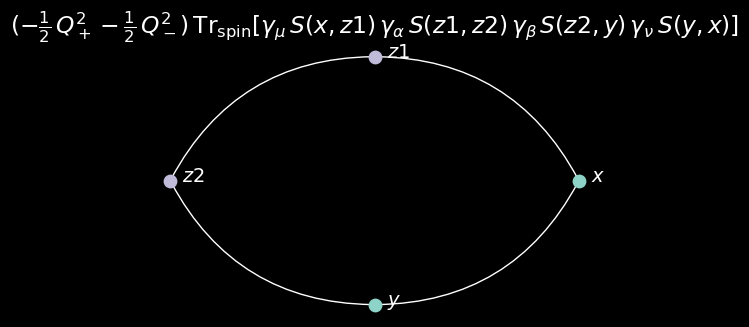

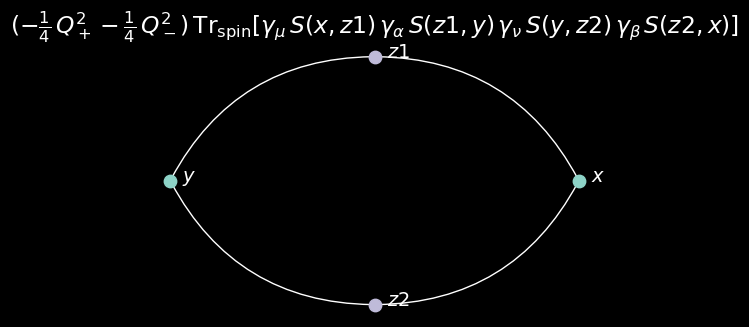

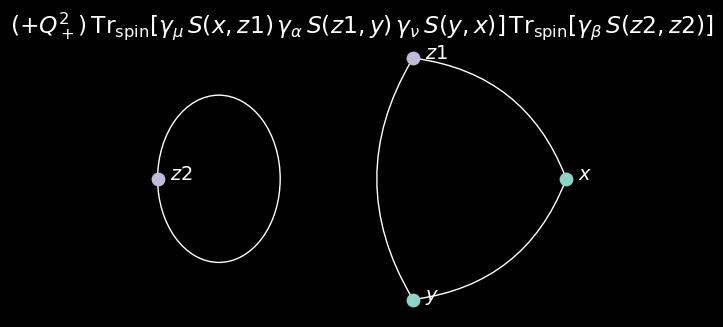

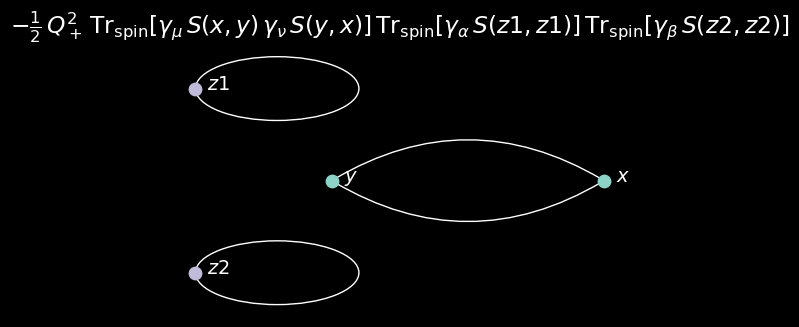

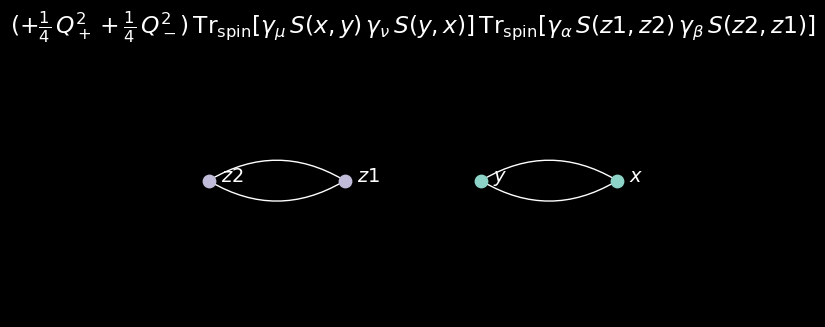

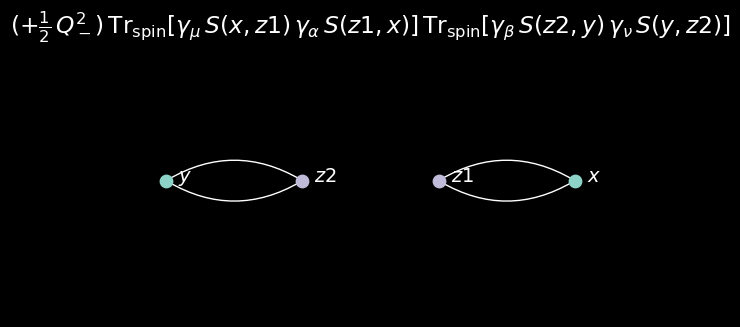

In [7]:
hvp_qed_2.draw()

# Tau two-point correlator QED corrections

In [8]:
tau_qed = Jn('x', r'\mu') * Jgamma_iso('z1',r'\alpha')() * Jgamma_iso('z2', r'\beta')() * Jp('y', r'\nu')
tau_qed_1 = tau_qed.wick().replace({'S_u': 'S', 'S_d': 'S'})
len(tau_qed_1)

52

In [9]:
tau_qed_2 = tau_qed_1.trace(['spin']).simplify(
    gc.ExchangeSymmetry(pos=['x','y'], lorentz=[r'\mu',r'\nu']),
    gc.ExchangeSymmetry(pos=['z1','z2'], lorentz=[r'\alpha',r'\beta']))
len(tau_qed_2)

5

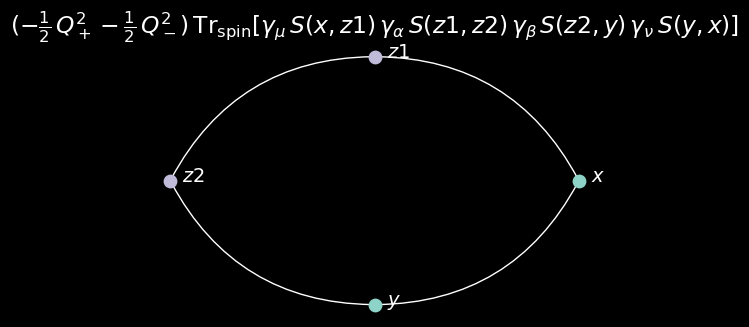

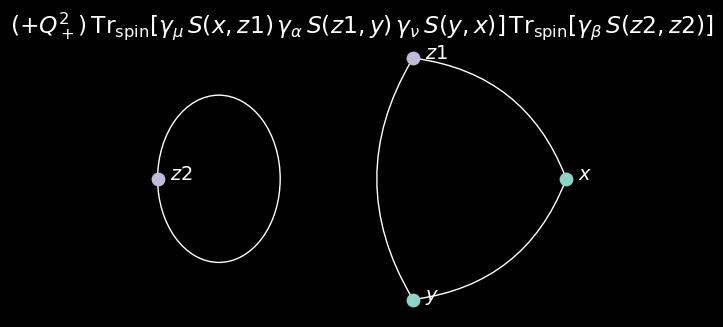

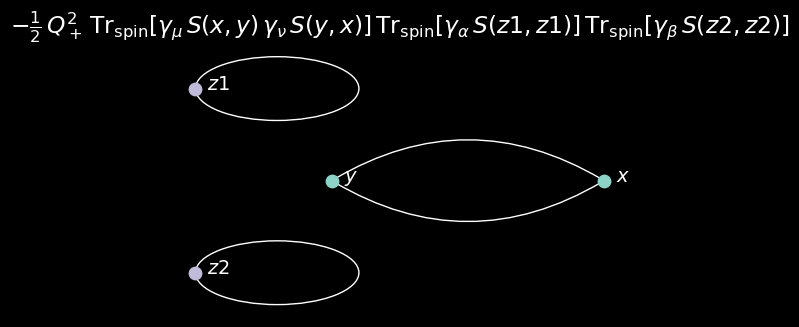

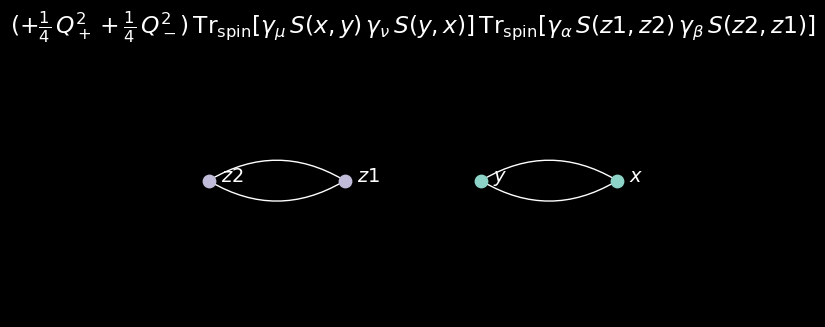

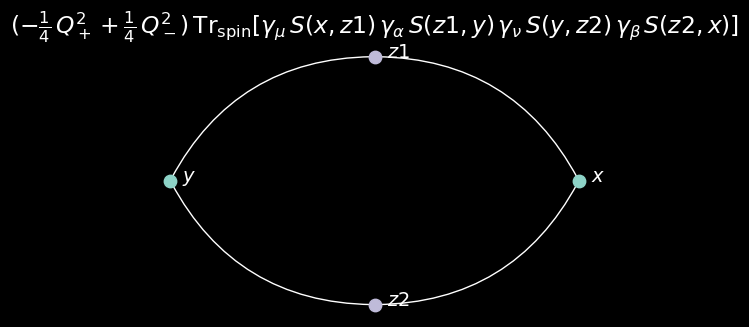

In [10]:
tau_qed_2.draw()

In [11]:
(hvp_qed_1.trace(['spin']) - tau_qed_1.trace(['spin'])).simplify(
    gc.ExchangeSymmetry(pos=['x','y'], lorentz=[r'\mu',r'\nu']),
    gc.ExchangeSymmetry(pos=['z1','z2'], lorentz=[r'\alpha',r'\beta'])
)

( +( +\frac{1}{2}\,Q_-^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z1)\,\gamma_{\alpha}\,S(z1, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\beta}\,S(z2, y)\,\gamma_{\nu}\,S(y, z2) ]+( -\frac{1}{2}\,Q_-^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z1)\,\gamma_{\alpha}\,S(z1, y)\,\gamma_{\nu}\,S(y, z2)\,\gamma_{\beta}\,S(z2, x) ] )

# Tau RI-MOM

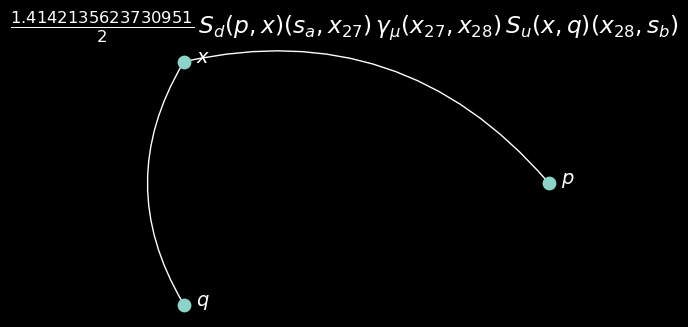

In [12]:
rimom = d('p', 's_a') * Jn('x',r'\mu') * ubar('q','s_b')
rimom.wick().draw()

In [13]:

rimom = gc.CNumber(math.sqrt(2)) * d('p', 's_a') * Jn('x',r'\mu') * ubar('q','s_b') * RI_Jgam_z1() * RI_Jgam_z2()
rimom2 = rimom.wick().replace({'S_u': 'S', 'S_d': 'S'})

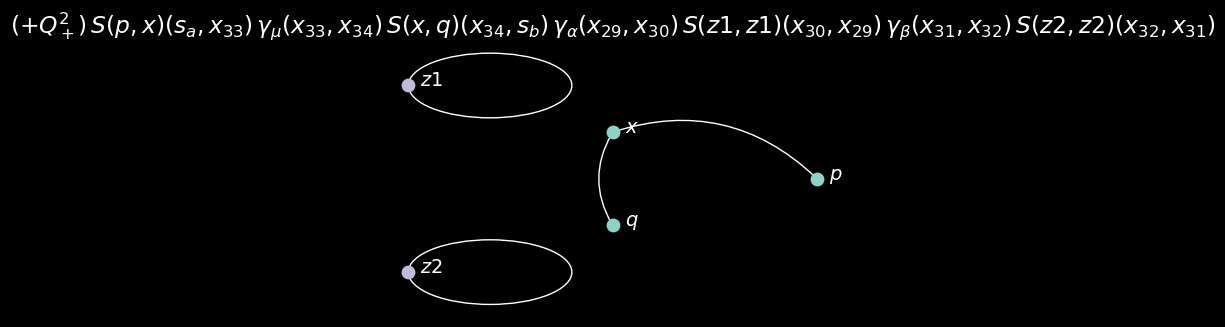

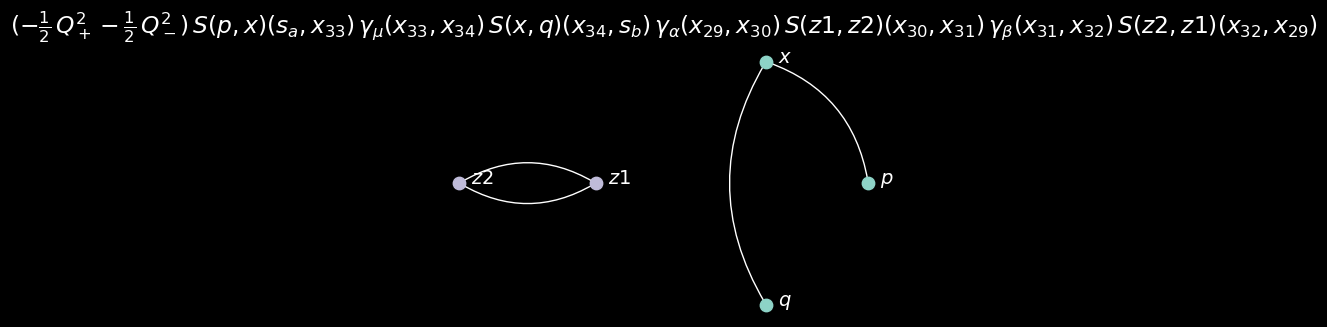

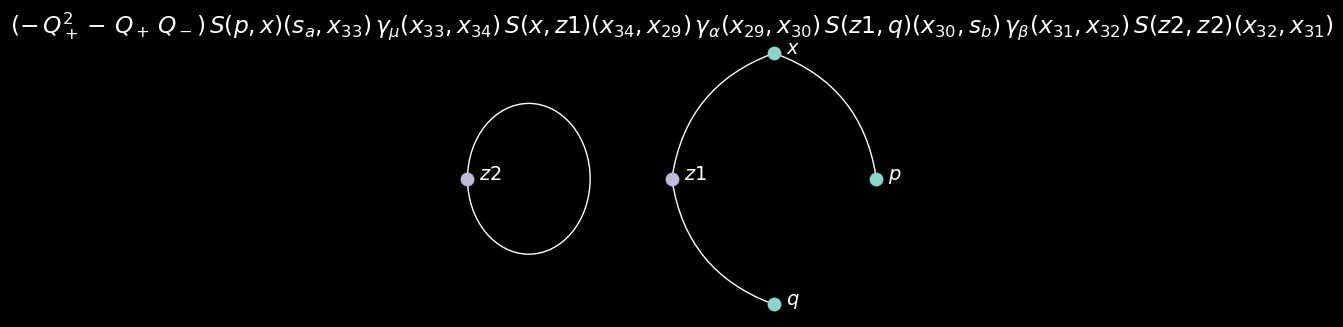

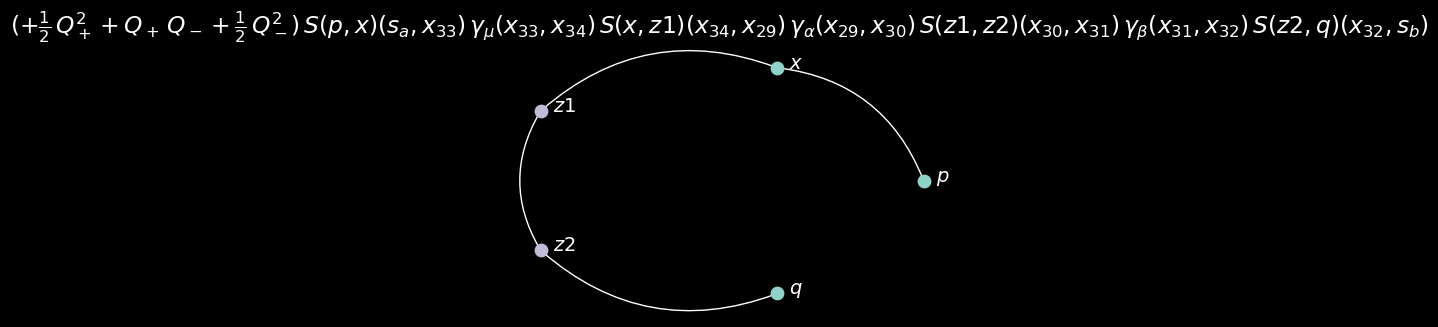

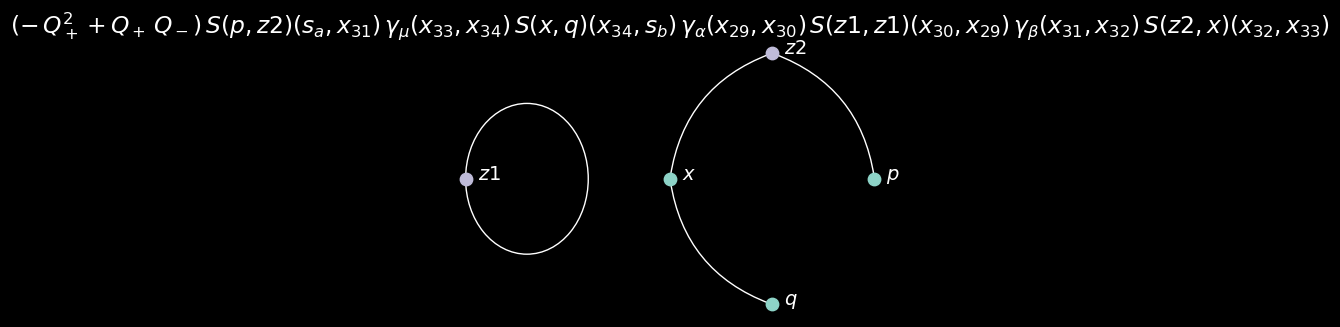

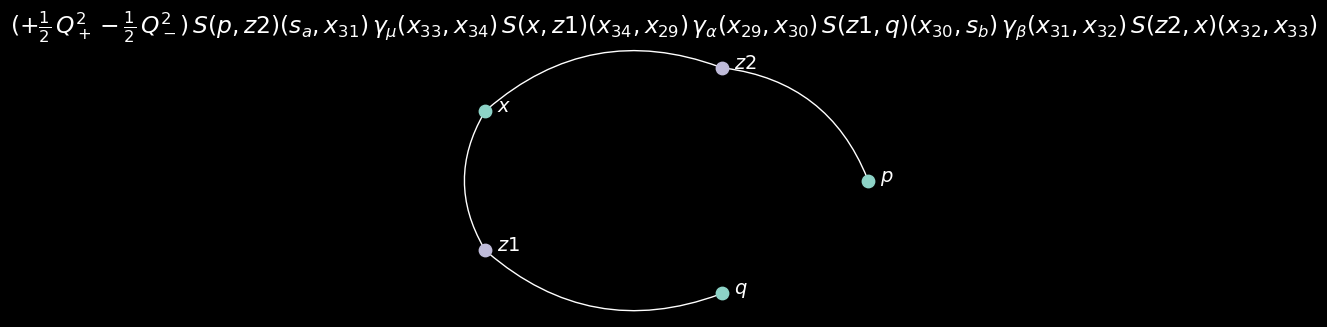

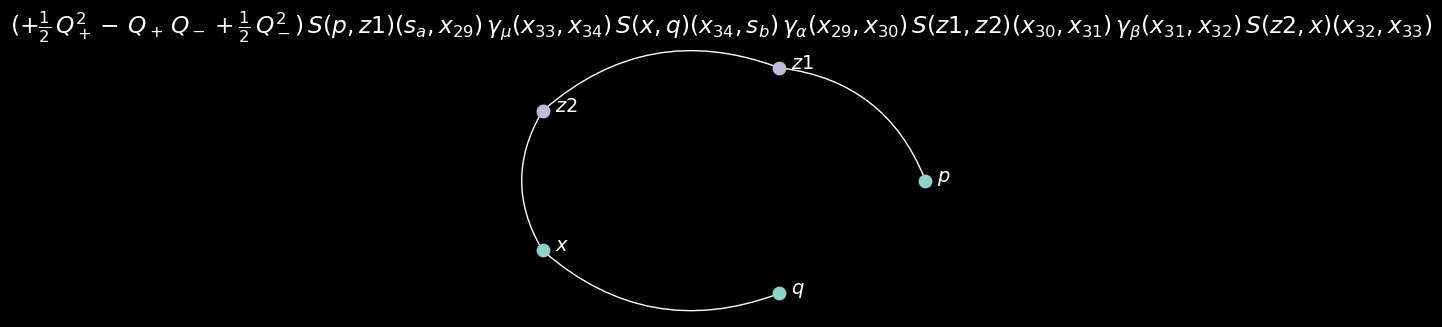

In [14]:
rimom2.simplify(*syms).draw()